<a href="https://colab.research.google.com/github/ansh90378/Speech_to_Text_recognizer/blob/main/Speech_to_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install all required modules

In [1]:
!pip install ffmpeg-python

In [2]:
!pip install SpeechRecognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 20.0 MB/s eta 0:00:00


In [3]:
!pip install SpeechRecognition pydub

# Speech To Text

## Import Libraries

In [4]:
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
from scipy.io.wavfile import read as wav_read
import io
import ffmpeg

import speech_recognition as Sr
import matplotlib.pyplot as plt
from scipy.io.wavfile import write

## Get real time input(Speeach)

In [5]:
"""
To write this piece of code I took inspiration/code from a lot of places.
Here are some of the possible references:
https://blog.addpipe.com/recording-audio-in-the-browser-using-pure-html5-and-minimal-javascript/
https://stackoverflow.com/a/18650249
https://hacks.mozilla.org/2014/06/easy-audio-capture-with-the-mediarecorder-api/
https://air.ghost.io/recording-to-an-audio-file-using-html5-and-js/
https://stackoverflow.com/a/49019356
"""
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
from scipy.io.wavfile import read as wav_read
import io
import ffmpeg

AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("Press to start recording");

my_btn.appendChild(t);
//my_p.appendChild(my_btn);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    //bitsPerSecond: 8000, //chrome seems to ignore, always 48k
    mimeType : 'audio/webm;codecs=opus'
    //mimeType : 'audio/webm;codecs=pcm'
  };
  //recorder = new MediaRecorder(stream, options);
  recorder = new MediaRecorder(stream);
  recorder.ondataavailable = function(e) {
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('audio');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);

    reader = new FileReader();
    reader.readAsDataURL(e.data);
    reader.onloadend = function() {
      base64data = reader.result;
      //console.log("Inside FileReader:" + base64data);
    }
  };
  recorder.start();
  };

recordButton.innerText = "Recording... press to stop";

navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);


function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Saving the recording... pls wait!"
  }
}

// https://stackoverflow.com/a/951057
function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
//recordButton.addEventListener("click", toggleRecording);
recordButton.onclick = ()=>{
toggleRecording()

sleep(2000).then(() => {
  // wait 2000ms for the data to be available...
  // ideally this should use something like await...
  //console.log("Inside data:" + base64data)
  resolve(base64data.toString())

});

}
});

</script>
"""

def get_audio():
  display(HTML(AUDIO_HTML))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])

  process = (ffmpeg
    .input('pipe:0')
    .output('pipe:1', format='wav')
    .run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
  )
  output, err = process.communicate(input=binary)

  riff_chunk_size = len(output) - 8
  # Break up the chunk size into four bytes, held in b.
  q = riff_chunk_size
  b = []
  for i in range(4):
      q, r = divmod(q, 256)
      b.append(r)

  # Replace bytes 4:8 in proc.stdout with the actual size of the RIFF chunk.
  riff = output[:4] + bytes(b) + output[8:]

  sr, audio = wav_read(io.BytesIO(riff))

  return audio, sr

In [31]:
audio, sr = get_audio()

## Analysis Input matrix

In [32]:
sr

48000

In [33]:
byte_io = io.BytesIO(bytes())
write(byte_io, sr, audio)
result_bytes = byte_io.read()


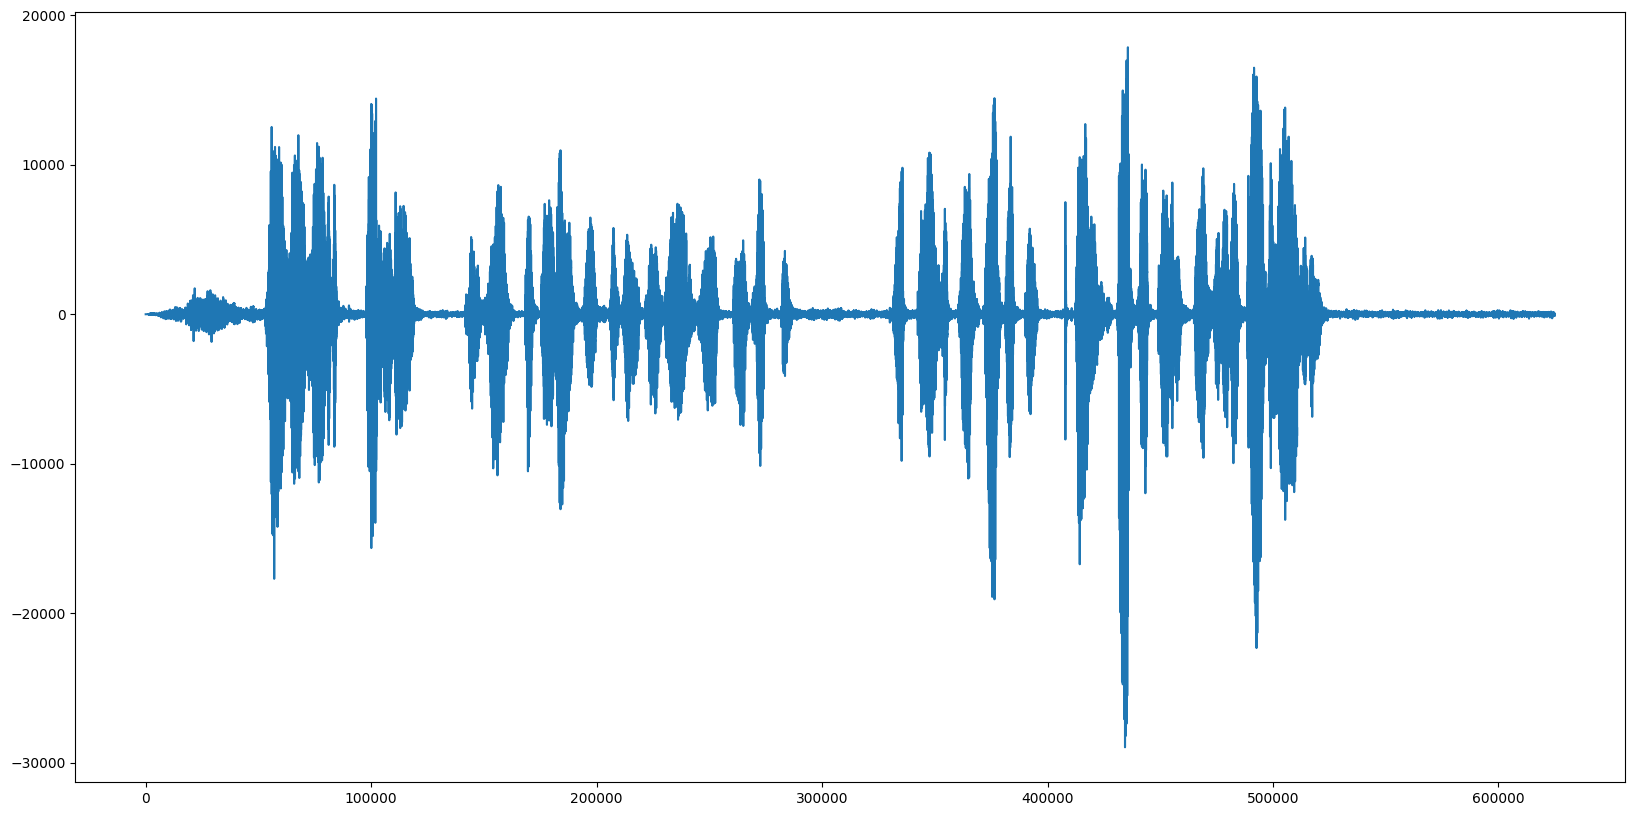

In [34]:
plt.figure(figsize=(20,10))
plt.plot(audio)
plt.show()

## Using google translator API

In [35]:
audio_data = Sr.AudioData(result_bytes, sr, 2)

r = Sr.Recognizer()

txt = r.recognize_google(audio_data)

print("You Said: " + txt)


You Said: my name is ansh and I am excited to introduce my project speech to text and text to speech recognizer


In [36]:
!pip install pyttsx3

def SpeakText(text):

  engine = pyttsx3.init()
  engine.say(text)
  engine.runAndWait()


# Text  To  Speech


In [16]:
!pip install gtts

In [17]:
from gtts import gTTS
from IPython.display import Audio

## Use GTTS module

In [38]:
text_to_say = "You Said" + txt
language = "en"

if txt == "what is your name":
  txt = "Assistent"
  text_to_say = "Hi there I'm you'r first " + txt

if txt == "what's my name":
  text_to_say = "your name is Ansh"

if "countdown" in txt:
  text_to_say = "10 9 8 7 6 5 4 3 2 1 "


gtts_object = gTTS(text=text_to_say,
                   lang=language,
                   slow=False)
gtts_object.save("/content/gtts.wav")

In [39]:
Audio("/content/gtts.wav")